# General Understanding

The United States constitution requires a decennial census.   The census provides a headcount which does not provide enough details to make data driven decisions about the distribution of government funds.  A long form census with necessary details was introduced in the 20th century.   Only one in six households received the additional questions on the long form.  In the 21st century, the American Community Survey (ACS) was established to conduct ongoing surveys with the details previously included on the decennial long form census.   The ACS survey results provide data to determine the appropriate distribution of more than $400 billion in federal and state funds.  The funds are for social programs as well as physical and service infrastructure.  Annually 3.5 million homes are surveyed for the ACS.   

The attributes from the personal data allow for exploration of the correlation between select attributes and the total income. 


Source: https://www.census.gov/programs-surveys/acs/
        https://www.kaggle.com/census/2013-american-community-survey


# Data Description

Data from the 2013 ACS is available.  The data is segmented into housing data which applies to the entire household and personal data which provides detailed data for all individuals living in the household surveyed.  The household and personal data are independent.   No attempt was made to consolidate the files on this exploration of the data.   

Due to the size of the files and the number of attributes, the focus was on the 2.5% random sample of the personal data.  The personal data sample contains over seventy thousand (78,320) records with 283 attributes.  The descriptions of all attributes is contained in the data dictionary from the US Census Bureau.

Data Dictionary:  https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMSDataDict13.txt

For the exploratory analysis, all children were omitted from the data.  The question was the factors influencing poverty and income.  Any inferences would be limited to the sample population and would not be causal inferences.


### Data Descriptions
Several key variables were included in the exploratory analysis.  The following lists the attributes used for the data exploration.    

Attributes used for data exploration and visualization:
  * AGEP:  Age of person (continuous 0-95)
  * CIT:  Citizenship status (categorical - numerical key)
  * CIT_CAT:  Citizenship status (categorical - string)
  * COW:  Class of worker (categorical - string)
  * ENG:  Ability to speak English (categorical scale of 1-4 and native speakers)
  * JWMNP:  Travel time to work (continuous - minutes of commute to work)
  * JWTR:  Means of transportation to work (categorical - 12 modes of transportation)
  * MAR:  Marital status (categorical - 5 categories: married, divorced, separated, single, widow)
  * OC_CAT:  Own child (Boolean)
  * PAP:  Public assistance income past 12 months (continuous variable of dollars of assistance received)
  * PINCP:  Total person's income (continuous of total income)
  * POVPIP:  Income-to-poverty ratio recode (continuous with a cap at 501)
  * PUMA:  Public use microdata area code (PUMA) based on 2010 Census  (provides geographic data of individual location)
  * RAC1P:  Recoded detailed race code (categorical - 9 categories including 7 primary categories and 2 miscellaneous categories)
  * SCHL:  Educational attainment (continuous - years of completed education)
  * SEX:  Sex (gender of female or male)
  

### Randomized Sampling of the ACS Personal Data
A randomized sample was generated from the 

In [ ]:
#####Need to add in code for sampling#######

### Data Loaded
The data is loaded from the random sample

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The original dataset contained approximately 3.1 million records. We quickly found that using the entire dataset would be much too arduous on our computers and would take too much time to gain meaningful information from the data.

Instead of using the massive, original dataset; we decided to take a subset of the dataset. The new dataset includes 2.5% of the original obserations (approximate 78,000 rows). We recognize that there will be some loss in the interpretability of any statistical observations we make on this subset.

In [2]:
df = pd.read_csv('../data/person-subset-2.5percent.csv')

## Poverty

In [3]:
df.POVPIP.describe()

count    75204.000000
mean       304.934019
std        165.949662
min          0.000000
25%        159.000000
50%        307.000000
75%        501.000000
max        501.000000
Name: POVPIP, dtype: float64

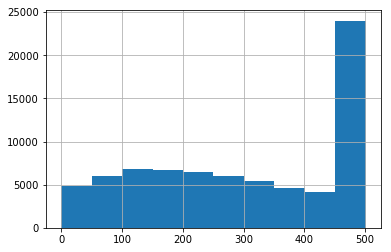

In [4]:
df.POVPIP.hist()
plt.show()

### Relationships between attributes
The focus of data exploration was on the effects of various attributes on income and poverty.   

#### Relationship between travel time to work in total income:
The correlation between the travel time and the total income was not as expected.  The expectation was that longer travel times would be for higher paying employment.  One possibility to explore is the travel times may be longer in the rural areas where wages are traditionally lower as in the cost of living. 

In [ ]:
### Scatterplot of Income and commute time
df.plot.scatter(x='JWMNP', y='PINCP')
plt.xlabel('Commute Time in minutes')
plt.ylabel('Income')

#### Relationship between Ability to speak English and Income:
The ACS is focused on US households.  The ability to speak English has a strong impact on income.  Interestingly, the average income for non-native English speaker who speak very well is higher than the average income for native speakers of English.  

In [ ]:
### Barplot of Average Income and Ability to Speak English
df.groupby('ENG_CAT').PINCP.mean().plot.bar()
plt.xlabel('Ability to Speak English')
plt.ylabel('Average Income')

#### Relationship between years of education and Income:
As expected, the years of education have a correlation to the income.  Interestingly, the correlation has some exceptions.   Income for those who only completed high school or some college does not increase.   A significant jump in income can be seen with the completion of college.

In [ ]:
### Simple plot of years of education and total income
df.plot.scatter(x='SCHL', y='PINCP')
plt.xlabel('Years of Education')
plt.ylabel('Income')

#### Relationship of Gender and Marital Status on Poverty
A subset of the random sample containing only those with poverty level income to poverty ratios was created.  A comparison of the number of individuals of each marital status and gender was examined.  Single women had the highest frequency of poverty.  In all marital status categories, women had higher frequencies of poverty.

In [ ]:
### Gender and Marital Status in poverty
df_poverty = df[df.POVPIP <100]
df_grouped = df_poverty.groupby(by=['MAR', 'SEX'])
genderpov=df_grouped.MAR.count()
genderpov_df = genderpov.to_frame('genderpov')
print (genderpov_df)
print (genderpov_df.unstack())
ax = genderpov.unstack().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Income')

#### Relationship of Race and Income
Several attributes from the survey apply to the ancestry and race.  One attribute was the highest level only considering 7 primary categories of race.  The average income for the racial categories were varied.  The average income of those indicating Asian was the highest.

In [ ]:
### Attempt race and income
df['RAC1P'] = df.RAC1P.astype('category').astype('str')
df.RAC1P = df.RAC1P \
    .replace('1', 'White') \
    .replace('2', 'Afican American') \
    .replace('3', 'American Indian') \
    .replace('4', 'Alaska Native') \
    .replace('5', 'Native American Unspecified') \
    .replace('6', 'Asian') \
    .replace('7', 'Native Pacific Islander') \
    .replace('8', 'Other') \
    .replace('9', 'More than 2 races')

df_race = df.groupby(by='RAC1P')
race = df_race.PINCP.mean()
print(race)
ax = race.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Average Income')

#### Relationship of Gender and Income
The relationship between gender and income is often a social discussion.  No consideration was given to any factors other than gender.   Other attributes such as class of worker, education, and type of position may impact the income.  The average income for women was 58.7% of male average income.

In [ ]:
### Attempt race and income
df_sex = df.groupby(by='SEX')
sex = df_sex.PINCP.mean()
print(sex)
ax = sex.plot(kind='barh')
plt.ylabel('Gender')
plt.xlabel('Average Income')

df_women = df[df.SEX == "Female"]
df_men = df[df.SEX == "Male"]
fem = df_women.PINCP.mean()
mal = df_men.PINCP.mean()
per = fem/mal
print (per)

### Additional Features
As mentioned in the introduction, other attributes may be considered in the analysis of the data.   Included in the personal data are military history, disabilities, race, and ancestry.   In the associated housing file, attributes about housing details, expenses of the household, and internet access are included.  Due to the one to many relationship from the housing data to the personal data, no attempt was made to combine the data at this time.

Examples of additional attributes that may be explored within the personal dataset:
    * Disabilities: Includes a variety of disability indicators such as vision, hearing, cognitive, and self-care.
    * Military Service: Includes era of service, duration of service, and disability from service.
    * Ancestry:  Includes more specific details on race as well as country of origin for ancestry.
    * Family unit:  Includes details about multigenerational homes and the responsibility of grandparents caring for grandchildren.
    * Insurance:  Includes the source of the insurance.

Examples of attributes from the housing data:
    * Home features:  Includes bathrooms, bedrooms, running water, and other home features.
    * Internet access types.
    * Home expenses:  Includes utilities, rent, and mortgages.